# UC San Diego: Data Science in Practice - EDA Checkpoint
### Summer Session I 2023 | Instructor : C. Alex Simpkins Ph.D.

Health Insurance Claim Analysis: Correlation between BMI of Diabetic Individuals and Their Insurance Claims

# Names

- Xuan Jiang
- Jiafeng Wu
- Yian He
- Muen Hsu
- Zixuan Zhai
- Jiaxi Lin

<a id='research_question'></a>
# Research Question

- Does diabetic individuals with higher BMI (Body Mass Index) more likely to have higher health insurance claim amounts?

Independent Variable: BMI of people with diabetes 
(Possible) Dependent Variable: Health Insurance Claim Amounts

# Setup

In [831]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats



# Data Wrangling


In [832]:
# import data
file  = '/Users/jiangxuan/Desktop/1651277648862_healthinsurance (1).csv'
df = pd.read_csv(file)
print(df.head())
df.shape

    age     sex  weight   bmi hereditary_diseases  no_of_dependents  smoker  \
0  60.0    male      64  24.3           NoDisease                 1       0   
1  49.0  female      75  22.6           NoDisease                 1       0   
2  32.0  female      64  17.8            Epilepsy                 2       1   
3  61.0  female      53  36.4           NoDisease                 1       1   
4  19.0  female      50  20.6           NoDisease                 0       0   

          city  bloodpressure  diabetes  regular_ex    job_title    claim  
0      NewYork             72         0           0        Actor  13112.6  
1       Boston             78         1           1     Engineer   9567.0  
2  Phildelphia             88         1           1  Academician  32734.2  
3    Pittsburg             72         1           0         Chef  48517.6  
4      Buffalo             82         1           0   HomeMakers   1731.7  


(15000, 13)

In [833]:
graph_selected_columns = ['age', 'sex', 'weight', 'bmi', 'smoker', 'diabetes', 'claim']
graph_df = df.loc[:,graph_selected_columns]
print(graph_df.head())

    age     sex  weight   bmi  smoker  diabetes    claim
0  60.0    male      64  24.3       0         0  13112.6
1  49.0  female      75  22.6       0         1   9567.0
2  32.0  female      64  17.8       1         1  32734.2
3  61.0  female      53  36.4       1         1  48517.6
4  19.0  female      50  20.6       0         1   1731.7


In [834]:
# We are only working on a subset of this dataset
selected_columns = ['bmi', 'diabetes', 'claim']
sub_df = df.loc[:,selected_columns]
sub_df.head()

# We are only interested in the BMI and Claim data for diabetic individuals 
number_diabetic_individuals = sum(sub_df['diabetes'] == 1)
print(number_diabetic_individuals)

# Now we drop the rows for people don't have diabetes 
rows_to_drop = sub_df.loc[sub_df['diabetes'] == 0].index
sub_df = sub_df.drop(rows_to_drop)
sub_df = sub_df.loc[:,['bmi','claim']]
print(sub_df)


11655
        bmi    claim
1      22.6   9567.0
2      17.8  32734.2
3      36.4  48517.6
4      20.6   1731.7
7      26.8   1534.3
...     ...      ...
14995  28.3  21082.2
14996  29.6   7512.3
14997  33.3   1391.5
14998  36.7   9144.6
14999  26.4  25992.8

[11655 rows x 2 columns]


# Data Cleaning

Describe your data cleaning steps here.

In [835]:

# Determine how many empty cells in the column "bmi，claim"
empty_cells_bmi = sub_df['bmi'].isnull().sum()
print(empty_cells_bmi)
empty_cells_claim = sub_df['claim'].isnull().sum()
print(empty_cells_claim)

# Determine how many rows that have no data in all columns 
empty_rows = sub_df.isnull().all(axis=1).sum()
print(empty_rows)



673
0
0


Filtering the Dataframe

In [836]:

# Remove the rows where all cells have missing data
cleaned_df = sub_df.dropna(how='all')
# Remove the rows where the cells in column "bmi" have missing data 
cleaned_df = cleaned_df[cleaned_df['bmi'].isnull()== False]
# Now we have a clean dataframe that only contains BMI and claim amounts of diabetic individuals 
cleaned_df

,bmi,claim
1,22.6,9567.0
2,17.8,32734.2
3,36.4,48517.6
4,20.6,1731.7
7,26.8,1534.3
...,...,...
14995,28.3,21082.2
14996,29.6,7512.3
14997,33.3,1391.5
14998,36.7,9144.6


# Data Analysis & Results (EDA)

Carry out EDA on your dataset(s); Describe in this section

- Descripitive Statistics 


In [837]:
cleaned_df.describe()

,bmi,claim
count,10982.000000,10982.000000
mean,30.532735,14139.657977
std,6.087261,12669.106924
min,16.000000,1121.900000
25%,25.900000,5148.600000
50%,29.600000,10118.400000
75%,34.700000,17942.100000
max,52.600000,63770.400000


# Univariate Quantitative EDA

- Claim Amount Distribution 

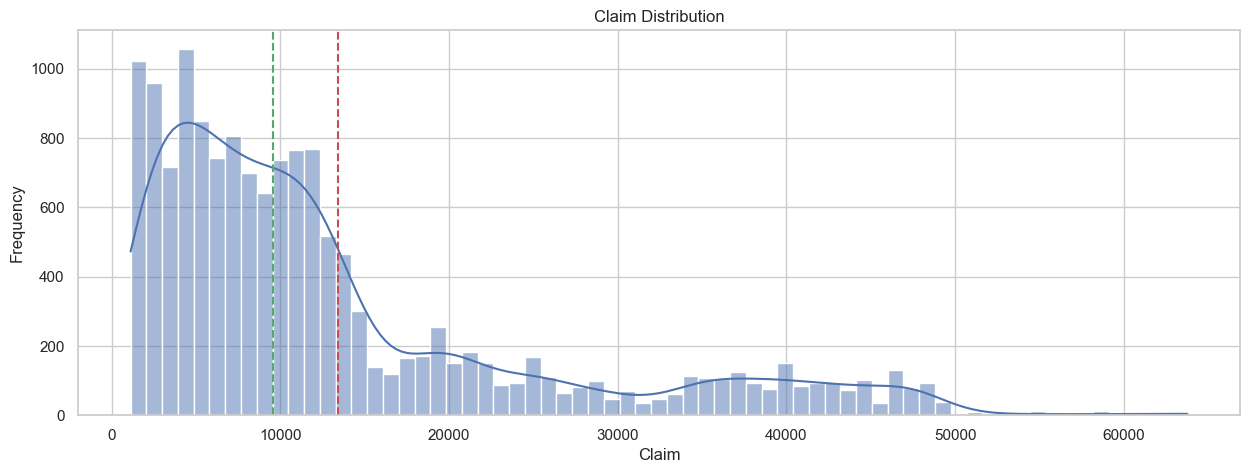

Skewness: 1.4978293015042263
Mean: 13401.43762
Median: 9545.650000000001


In [838]:
plt.figure(figsize=(15, 5))
sns.histplot(x='claim', data=graph_df, kde=True)
plt.axvline(graph_df.claim.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(graph_df.claim.median(), color='g', linestyle='--', label='Median')
plt.title('Claim Distribution')
plt.xlabel('Claim')
plt.ylabel('Frequency')
plt.show()
print(f'Skewness: {graph_df["claim"].skew()}')
print(f'Mean: {(graph_df["claim"].mean())}')
print(f'Median: {graph_df["claim"].median()}')

The graph above depicts the distribution of claim amounts among clients. On average, clients' claims amount to approximately 'dollar 13,401,' while the middle value stands at 9545.65 dollars. However, the distribution exhibits a right-skewed pattern, by a skewness value of 1.48, indicating that there are some clients with exceptionally high claim values, causing the right tail of the distribution to stretch further than the left tail, pulling the mean towards higher values while the median remains relatively lower.



- Age Distribution 

Text(0, 0.5, 'Frequency')

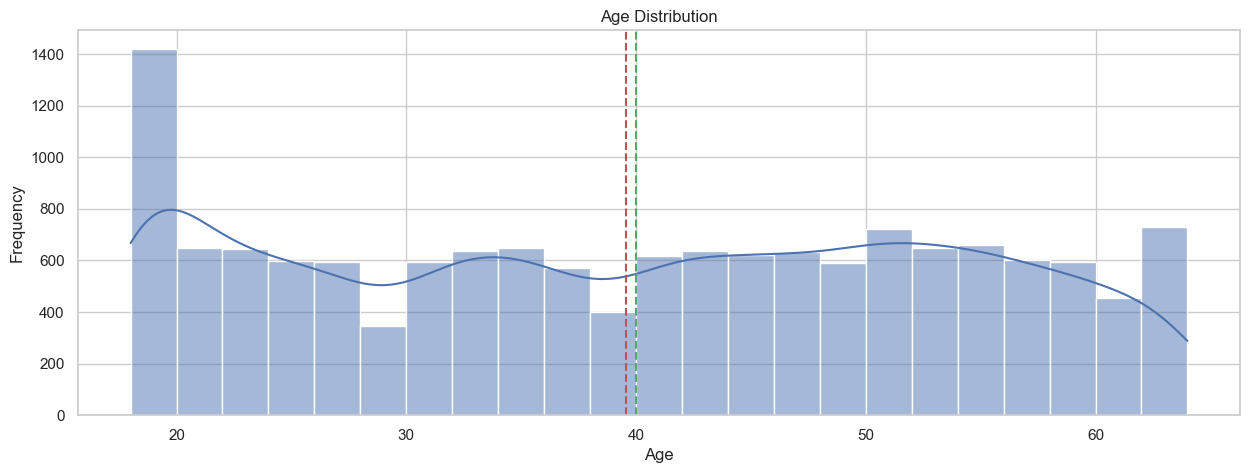

In [839]:
plt.figure(figsize=(15, 5))
sns.histplot(x='age', data=graph_df, kde=True)
plt.axvline(graph_df.age.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(graph_df.age.median(), color='g', linestyle='--', label='Median')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')

The age distribution of clients is characterized by a nearly normal distribution, as indicated by a skewness value close to 0. This suggests that the data is relatively symmetrical, with a balanced spread of ages around the central tendency. Both the mean and median values are close to each other.
On average, clients' age is approximately 40 years old. The youngest client is 18 years old, while the oldest client is 64 years old.

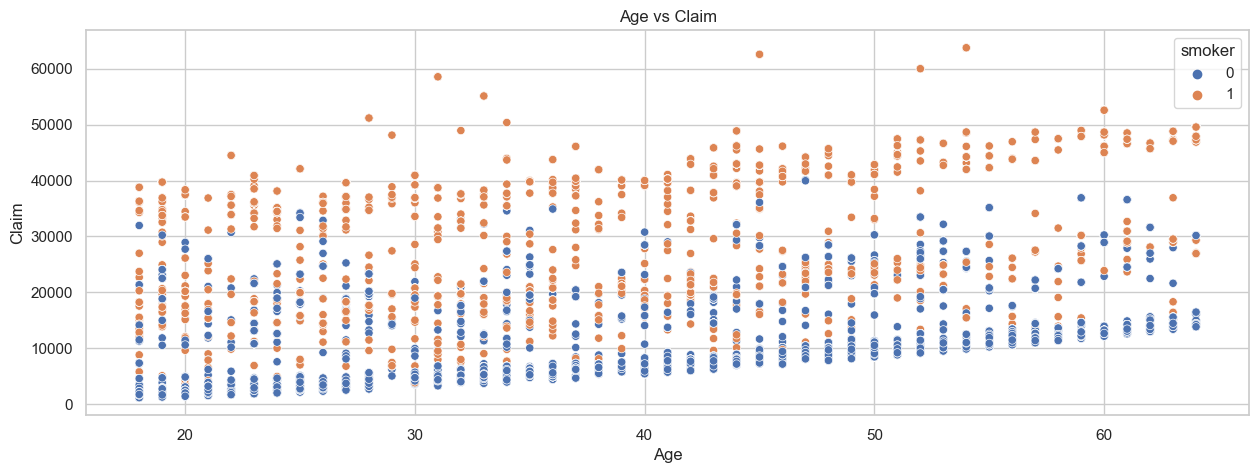

Skewness: 0.005576775986078496
Mean: 40
Median: 40.0
Minimum Age: 18.0
Maximum Age: 64.0


In [840]:
plt.figure(figsize=(15, 5))
sns.scatterplot(x='age', y='claim', data=graph_df, hue='smoker')
plt.title('Age vs Claim')
plt.xlabel('Age')
plt.ylabel('Claim')
plt.show()
print(f'Skewness: {graph_df["age"].skew()}')
print(f'Mean: {(graph_df["age"].mean()):.0f}')
print(f'Median: {graph_df["age"].median()}')
print(f'Minimum Age: {graph_df["age"].min()}')
print(f'Maximum Age: {graph_df["age"].max()}')

Examining the scatter plot reveals a positive correlation between the age column and the claims column. This implies that as the clients' age increases, their claims also exhibit a tendency to increase. Additionally, the data distinctly shows that claims for smokers are considerably higher compared to those for non-smokers.

- Gender Distribution 

Text(0, 0.5, 'Count')

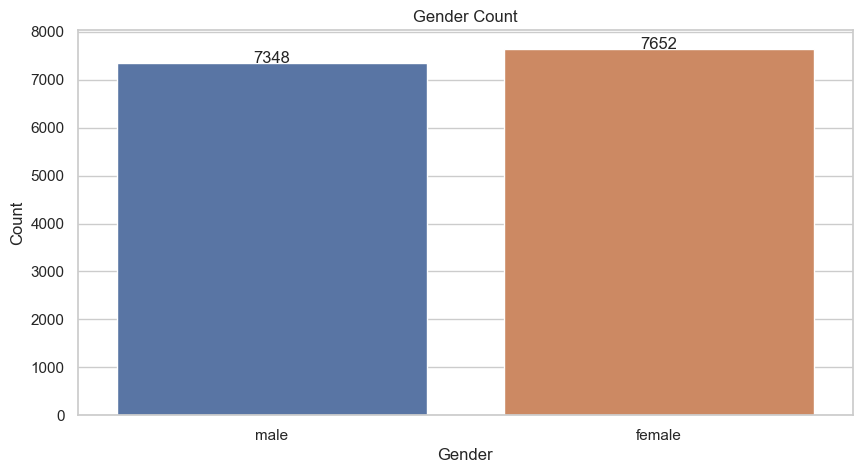

In [841]:
plt.figure(figsize=(10, 5))
fig = sns.countplot(x='sex', data=graph_df)
for p in fig.patches:
    height = p.get_height()
    fig.text(p.get_x() + p.get_width()/2.,height + 3, '{:1.0f}'.format(height), ha="center")
plt.title('Gender Count')
plt.xlabel('Gender')
plt.ylabel('Count')

0        1
1        0
2        0
3        0
4        0
        ..
14995    1
14996    1
14997    1
14998    1
14999    1
Name: sex, Length: 15000, dtype: int64


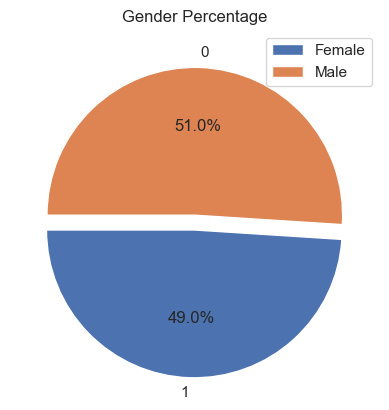

In [842]:

# Mapping dictionary for replacing female and male with 0 and 1
gender_mapping = {'female': 0, 'male': 1}
# Replace values in the 'sex' column in the cleaned dataframe
graph_df['sex']=graph_df['sex'].map(gender_mapping)
print(graph_df['sex'])
# Creating a pie chart to visualize the porportions of each gender in this dataset
plt.pie(graph_df.sex.value_counts().reindex([1, 0]), labels=graph_df.sex.value_counts().reindex([1, 0]).index, autopct='%1.1f%%', explode=[0.1, 0], startangle=180)
plt.title('Gender Percentage')
# Add legends 
plt.legend(labels=['Female', 'Male'])
plt.show()



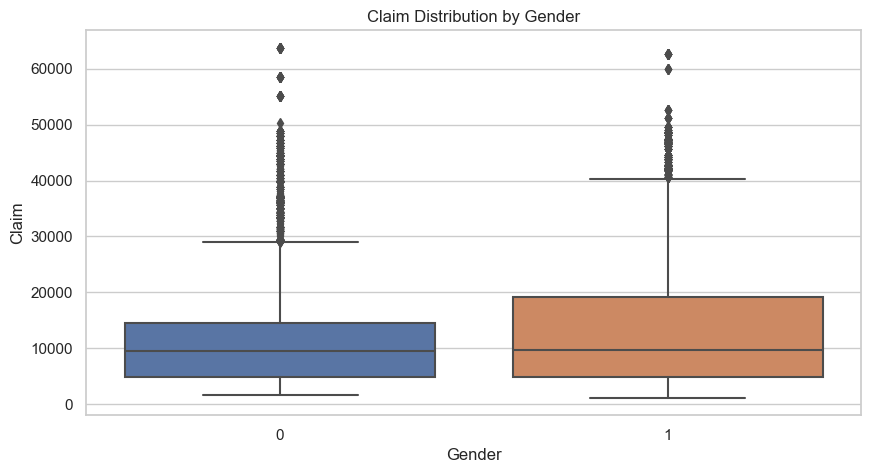

In [843]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='sex', y='claim', data=graph_df)
plt.title('Claim Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Claim')
plt.show()

In [844]:
round(graph_df.groupby('sex').claim.mean(), 0).reset_index()

,sex,claim
0,0,12692.0
1,1,14140.0


The distribution of female and male clients does not show a significant difference. There are 7348 (49%) male clients and 7652 (51%) female clients.

- BMI Distribution 

Text(0, 0.5, 'Frequency')

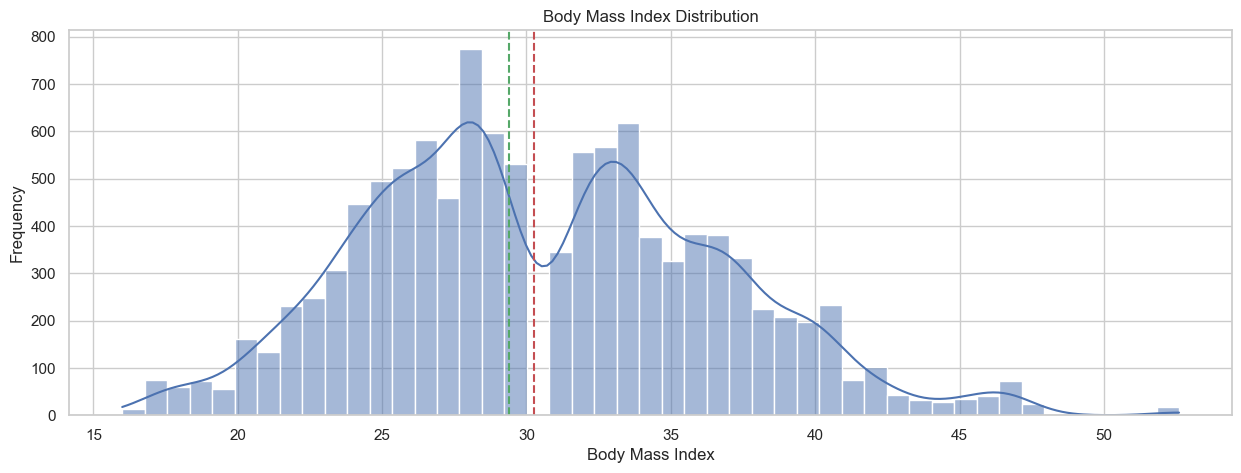

In [845]:
plt.figure(figsize=(15, 5))
sns.histplot(x='bmi', data=cleaned_df, kde=True)
plt.axvline(graph_df.bmi.mean(), color='r', linestyle='--', label='Mean')
plt.axvline(graph_df.bmi.median(), color='g', linestyle='--', label='Median')
plt.title('Body Mass Index Distribution')
plt.xlabel('Body Mass Index')
plt.ylabel('Frequency')

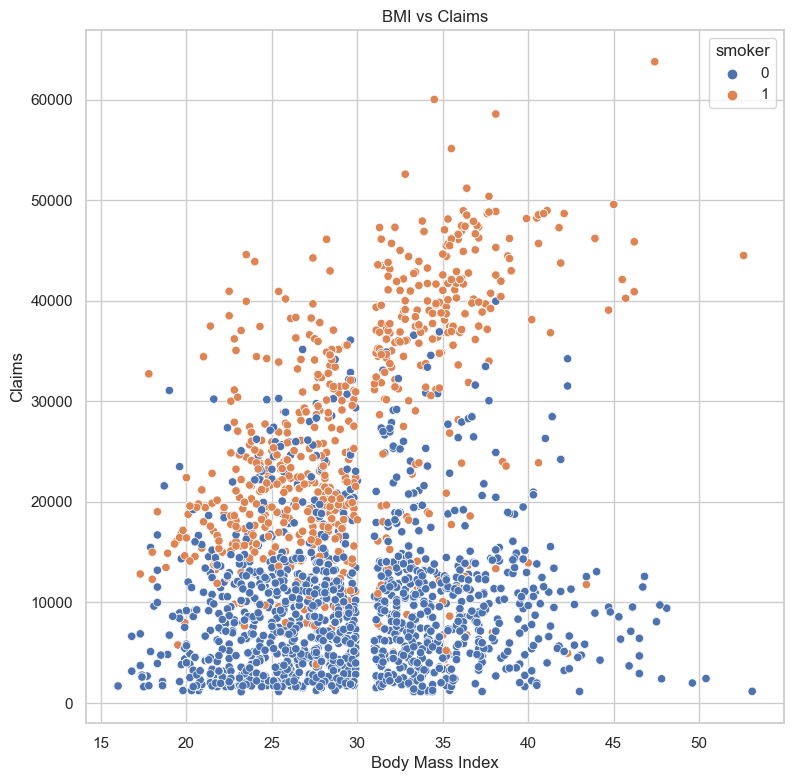

Skewness: 0.3752585894901583
Mean: 30.266412702933636
Median: 29.4


In [846]:
plt.figure(figsize=(9, 9))
sns.scatterplot(x='bmi', y='claim', data=graph_df, hue='smoker')
plt.title('BMI vs Claims')
plt.xlabel('Body Mass Index')
plt.ylabel('Claims')
plt.show()
print(f'Skewness: {graph_df["bmi"].skew()}')
print(f'Mean: {(graph_df["bmi"].mean())}')
print(f'Median: {graph_df["bmi"].median()}')

Clients have a mean Body Mass Index (BMI) of approximately 30.27 kg/m². The distribution of BMI follows a bimodal pattern. There are very few outliers in this column. Analyzing the scatter plot, we observe a weak positive correlation between the BMI parameter and the charges column. This indicates that for non-smoker customers, the increase in claims is not significantly influenced by their BMI. However, for smoker clients, there is a clear positive correlation. In other words, as their body mass index increases, their claims tend to be higher.

Text(0.5, 1.0, 'Smoker Percentage')

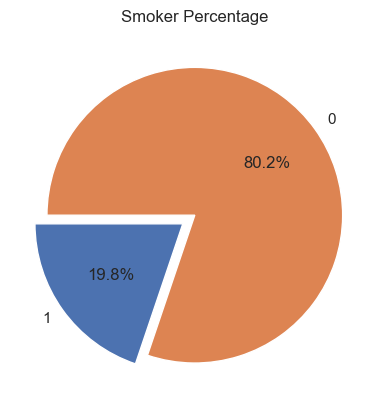

In [847]:
plt.pie(graph_df.smoker.value_counts().reindex([1, 0]), labels=graph_df.smoker.value_counts().reindex([1, 0]).index, autopct='%1.1f%%', explode=[0.1, 0], startangle=180)
plt.title('Smoker Percentage')

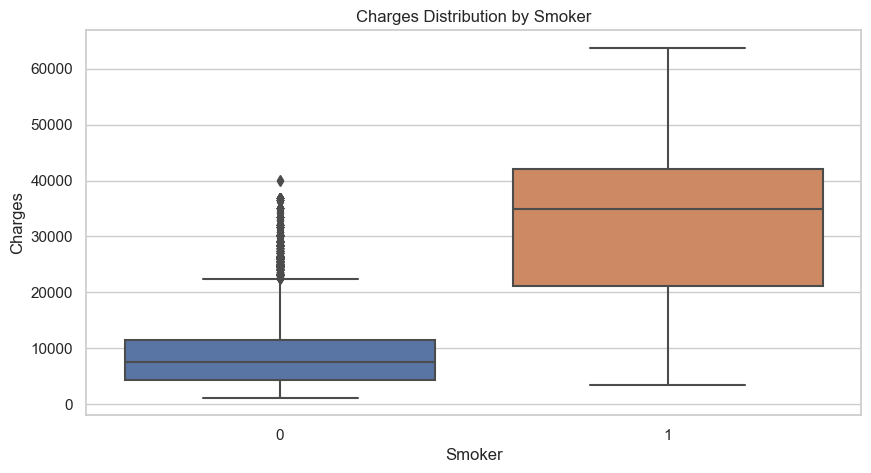

Average Charges for Smokers: $32302
Average Charges for Non-Smokers: $8731


In [848]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='smoker', y='claim', data=graph_df)
plt.title('Charges Distribution by Smoker')
plt.xlabel('Smoker')
plt.ylabel('Charges')
plt.show()
print(f"Average Charges for Smokers: ${(graph_df[graph_df.smoker == 1].claim.mean()):.0f}")
print(f"Average Charges for Non-Smokers: ${(graph_df[graph_df.smoker == 0].claim.mean()):.0f}")

Smokers make up only around 20% of all claims. Despite constituting a relatively small proportion, smokers bear a substantial cost, with an average payment of approximately dollar 32,302 per claim. In contrast, non-smokers, who represent a larger portion of claimants, pay significantly less on average, around dollar 8,731 per claim.

# Bivariate Quantitative EDA

In [849]:
correlation_matrix = cleaned_df.corr()
print(correlation_matrix)

            bmi     claim
bmi    1.000000  0.238034
claim  0.238034  1.000000


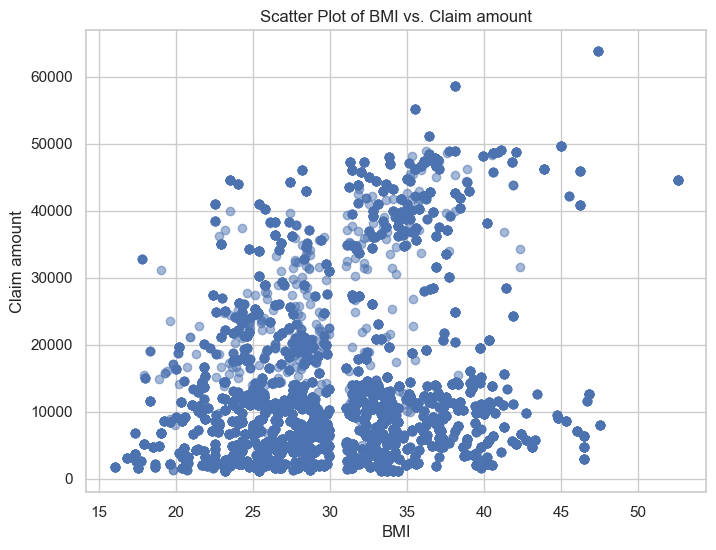

In [850]:
# Scatter plot to visualize the correlation 
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_df['bmi'], cleaned_df['claim'], alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Claim amount')
plt.title('Scatter Plot of BMI vs. Claim amount')
plt.grid(True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


R-squared value: 0.056660317632580254


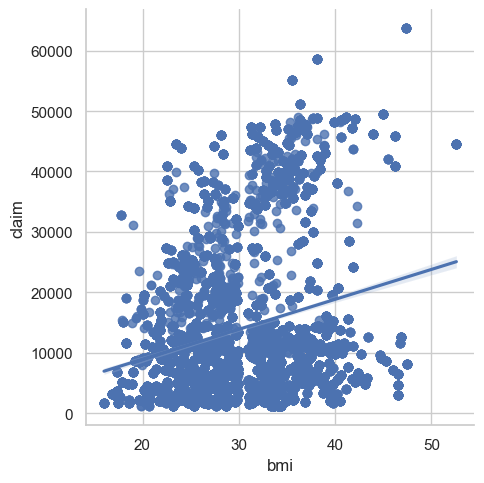

In [851]:
# Create the scatter plot with the trend line and calculate R-squared value
sns.lmplot(x='bmi', y='claim', data=cleaned_df)
slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_df['bmi'], cleaned_df['claim'])
r_squared = r_value ** 2

print("R-squared value:", r_squared)

Log Transformation:
If the dependent variable (insurance claim amount) is positively skewed, a log transformation can help stabilize the variance and make the relationship more linear. It can also help in reducing the impact of outliers.

In [852]:
# Log Transformation of Claim Amounts
cleaned_df['claim_log'] = np.log(cleaned_df['claim'])
print(cleaned_df)


        bmi    claim  claim_log
1      22.6   9567.0   9.166075
2      17.8  32734.2  10.396176
3      36.4  48517.6  10.789682
4      20.6   1731.7   7.456859
7      26.8   1534.3   7.335830
...     ...      ...        ...
14995  28.3  21082.2   9.956184
14996  29.6   7512.3   8.924297
14997  33.3   1391.5   7.238138
14998  36.7   9144.6   9.120919
14999  26.4  25992.8  10.165575

[10982 rows x 3 columns]


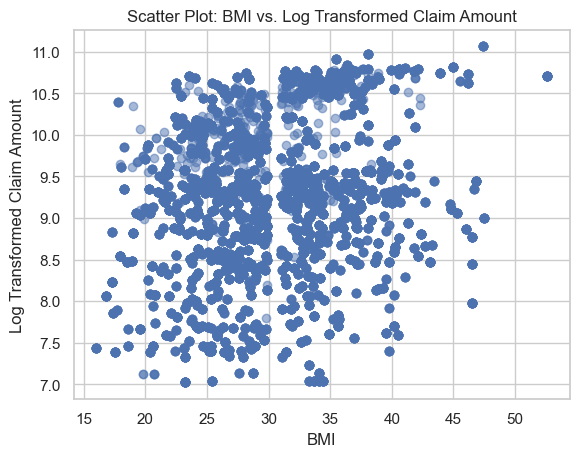

In [853]:
# Scatter plot with bmi and log transformed claim amount 
plt.scatter(cleaned_df['bmi'],cleaned_df['claim_log'],alpha=0.5)
plt.xlabel('BMI')
plt.ylabel('Log Transformed Claim Amount')
plt.title('Scatter Plot: BMI vs. Log Transformed Claim Amount')
plt.show()


We found out that the correlation between BMI and claim amout are not obvious, which we can tell by the dots in the graph.

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


R-squared value: 0.04824696073671382


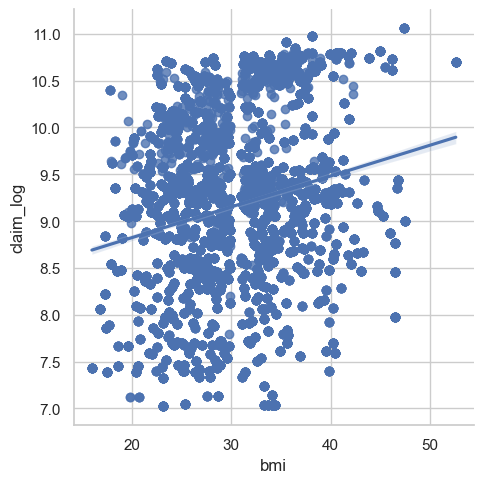

In [854]:
# Create the scatter plot with the trend line and calculate R-squared value
sns.lmplot(x='bmi', y='claim_log',data=cleaned_df)
slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_df['bmi'], cleaned_df['claim_log'])
r_squared = r_value ** 2
print("R-squared value:", r_squared)

We found out that this is a weak correlation. what about other health factors that will affect claim amount?


               age       sex    weight       bmi    smoker  diabetes     claim
age       1.000000  0.013461  0.285646  0.188336 -0.019627  0.070641  0.301158
sex       0.013461  1.000000  0.159249  0.077478  0.073981 -0.012622  0.059592
weight    0.285646  0.159249  1.000000  0.251649  0.015499 -0.010490  0.077716
bmi       0.188336  0.077478  0.251649  1.000000  0.023631  0.082376  0.206588
smoker   -0.019627  0.073981  0.015499  0.023631  1.000000  0.058164  0.773399
diabetes  0.070641 -0.012622 -0.010490  0.082376  0.058164  1.000000  0.135371
claim     0.301158  0.059592  0.077716  0.206588  0.773399  0.135371  1.000000


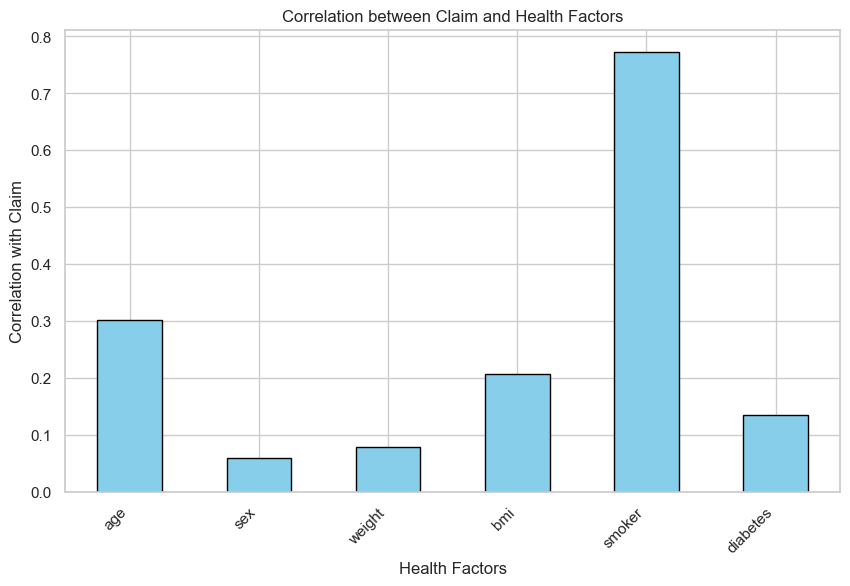

In [855]:
correlation_all = graph_df.corr()
print(correlation_all)
#visualize the correlation between health factors and claim amount using a bar plot
correlations = graph_df.corr()['claim'].drop('claim')  
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel('Health Factors')
plt.ylabel('Correlation with Claim')
plt.title('Correlation between Claim and Health Factors')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels 
plt.show()


We found out that the smoker has a strong correlation with claim by filtering out the dataframe again.
We now interested in the correlation between the bmi of diabetic individuals who smoke and claim amount.

In [856]:

new_selected_columns = ['bmi','smoker','diabetes','claim']
sub_df2 = df.loc[:,new_selected_columns]
sub_df2.head()
# Drop the data for people who are not diabetic 
rows_to_drop2 = sub_df2.loc[sub_df2['diabetes']==0].index
sub_df2 = sub_df2.drop(rows_to_drop2)
sub_df2 = sub_df2.loc[:,['bmi','smoker','claim']]
print(sub_df2)
# For people who are not diabetics, we drop the data for those who are not smoking 
rows_to_drop3 = sub_df2.loc[sub_df2['smoker']==0].index
sub_df2 = sub_df2.drop(rows_to_drop3)
sub_df2 = sub_df2.loc[:,['bmi','claim']]
print(sub_df2)
# Filter the data
cleaned_df2 = sub_df2[sub_df2['bmi'].isnull()== False]
print(cleaned_df2)
# Cleaned_df2 is dataset that we can readily use to perform our new EDA



        bmi  smoker    claim
1      22.6       0   9567.0
2      17.8       1  32734.2
3      36.4       1  48517.6
4      20.6       0   1731.7
7      26.8       0   1534.3
...     ...     ...      ...
14995  28.3       1  21082.2
14996  29.6       0   7512.3
14997  33.3       0   1391.5
14998  36.7       0   9144.6
14999  26.4       0  25992.8

[11655 rows x 3 columns]
        bmi    claim
2      17.8  32734.2
3      36.4  48517.6
10     33.0  44400.4
24     25.7  17942.1
27     38.4  41949.2
...     ...      ...
14971  27.3  18223.5
14977   NaN  39725.5
14983  38.4  40419.0
14990  36.0  42124.5
14995  28.3  21082.2

[2454 rows x 2 columns]
        bmi    claim
2      17.8  32734.2
3      36.4  48517.6
10     33.0  44400.4
24     25.7  17942.1
27     38.4  41949.2
...     ...      ...
14965  28.3  21082.2
14971  27.3  18223.5
14983  38.4  40419.0
14990  36.0  42124.5
14995  28.3  21082.2

[2289 rows x 2 columns]


In [857]:
cleaned_df2.corr()

,bmi,claim
bmi,1.000000,0.720731
claim,0.720731,1.000000


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


R-squared value: 0.5194524751171467


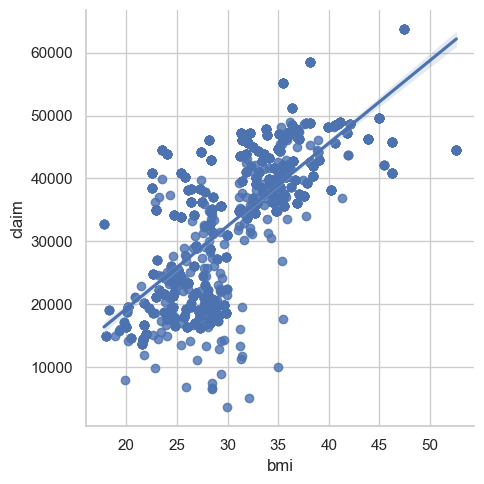

In [858]:
# Create the scatter plot with the trend line and calculate R-squared value
sns.lmplot(x='bmi', y='claim', data=cleaned_df2)
slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_df2['bmi'], cleaned_df2['claim'])
r_squared = r_value ** 2

print("R-squared value:", r_squared)

We found out that the R-squared value is 0.5, which is a much better correlation!

In [859]:
cleaned_df2['claim_log2'] = np.log(cleaned_df2['claim'])
print(cleaned_df2)


        bmi    claim  claim_log2
2      17.8  32734.2   10.396176
3      36.4  48517.6   10.789682
10     33.0  44400.4   10.701004
24     25.7  17942.1    9.794905
27     38.4  41949.2   10.644215
...     ...      ...         ...
14965  28.3  21082.2    9.956184
14971  27.3  18223.5    9.810467
14983  38.4  40419.0   10.607055
14990  36.0  42124.5   10.648385
14995  28.3  21082.2    9.956184

[2289 rows x 3 columns]


/var/folders/tc/pbz4y6wd0g7chz6vr038tb840000gn/T/ipykernel_9124/3328925047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df2['claim_log2'] = np.log(cleaned_df2['claim'])


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


R-squared value: 0.47240972496181904


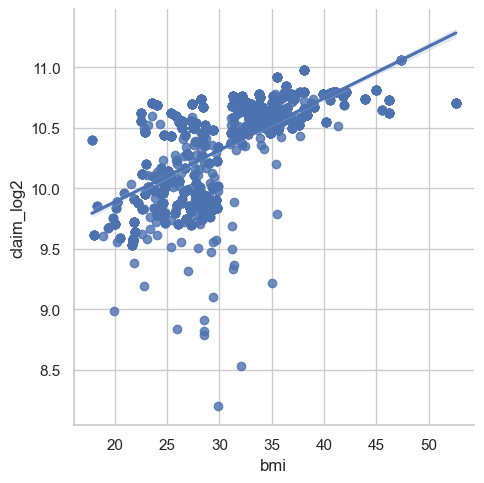

In [860]:
# Create the scatter plot with the trend line and calculate R-squared value
sns.lmplot(x='bmi', y='claim_log2',data=cleaned_df2)
slope, intercept, r_value, p_value, std_err = stats.linregress(cleaned_df2['bmi'], cleaned_df2['claim_log2'])
r_squared = r_value ** 2
print("R-squared value:", r_squared)

From fig..... we see that clearly for claim amount under 15000, they don't fit in the trendline ....

split the data into above 15000 and below 15000

In [865]:
below_15000 = cleaned_df2.loc[cleaned_df2['claim'] < 15000].index
cleaned_df2 = cleaned_df2.drop(below_15000)
above15000_df = cleaned_df2.loc[:,['bmi','claim']]
print(above15000_df)

        bmi    claim
2      17.8  32734.2
3      36.4  48517.6
10     33.0  44400.4
24     25.7  17942.1
27     38.4  41949.2
...     ...      ...
14965  28.3  21082.2
14971  27.3  18223.5
14983  38.4  40419.0
14990  36.0  42124.5
14995  28.3  21082.2

[2228 rows x 2 columns]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


R-squared value: 0.5108481786917564


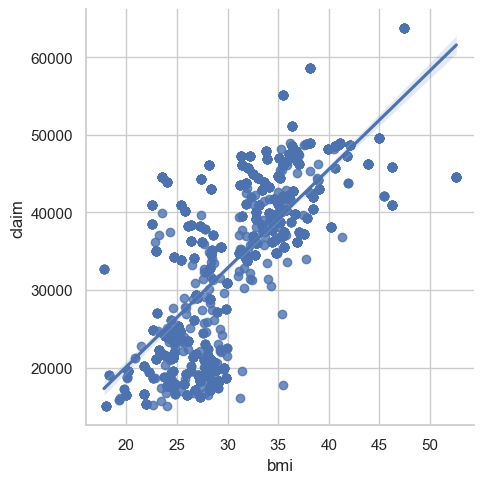

In [863]:
# Create the scatter plot with the trend line and calculate R-squared value
sns.lmplot(x='bmi', y='claim',data=above15000_df)
slope, intercept, r_value, p_value, std_err = stats.linregress(above15000_df['bmi'], above15000_df['claim'])
r_squared = r_value ** 2
print("R-squared value:", r_squared)

haha No difference  -- weak correlation indeed